<a href="https://colab.research.google.com/github/Zimo0528/Supply-Chain/blob/main/DL_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

## Load Churn Table

In [ ]:
import pandas as pd
churn = pd.read_csv('https://zhang-datasets.s3.us-east-2.amazonaws.com/telcoChurn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Check Distribution

<Axes: xlabel='Churn'>

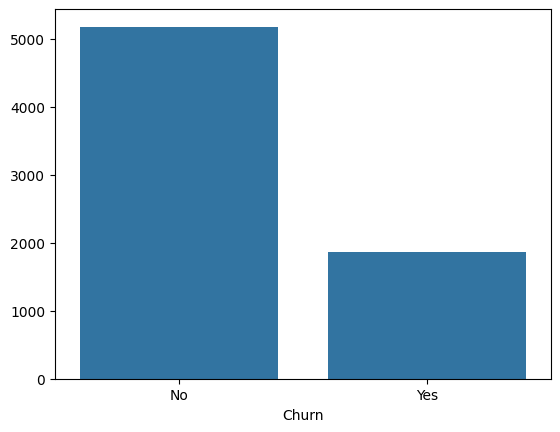

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_dist = churn['Churn'].value_counts()
sns.barplot(x=churn_dist.index, y=churn_dist.values)

## Check NA and Data Type

In [ ]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Check Value

In [ ]:
# Print unique values for each column
for column in churn.columns:
    unique_values = churn[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in 'gender': ['Female' 'Male']
Unique values in 'SeniorCitizen': [0 1]
Unique values in 'Partner': ['Yes' 'No']
Unique values in 'Dependents': ['No' 'Yes']
Unique values in 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in 'PhoneService': ['No' 'Yes']
Unique values in 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values in 'TechSupport': ['No' 'Yes' 'No internet service']
Unique valu

In [ ]:
churn[churn['PhoneService'] == 'No']['MultipleLines'].unique()

array(['No phone service'], dtype=object)

In [ ]:
churn[churn['PhoneService'] == 'Yes']['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
churn[churn['InternetService'] == 'No'].iloc[:,8:]

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
16,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7020,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7030,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


## Check Correlation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Starting with your base code
churn_inference = churn.copy()
service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
churn_inference = churn_inference.drop(columns = service_columns)
churn_inference = churn_inference.drop(columns = 'PhoneService')
churn_inference['TotalCharges'] = pd.to_numeric(churn_inference['TotalCharges'], errors='coerce')
churn_inference = churn_inference.dropna()  # Dropping rows with any NaN values
churn_inference['AdditionalCharges'] = churn_inference['TotalCharges'] - (churn_inference['MonthlyCharges'] * churn_inference['tenure'])
churn_inference = churn_inference.drop(columns = 'TotalCharges')
churn_inference = churn_inference.drop(columns="customerID")
churn_inference.head()

<ipython-input-27-20717f9cfe0a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_inference['AdditionalCharges'] = churn_inference['TotalCharges'] - (churn_inference['MonthlyCharges'] * churn_inference['tenure'])


,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,AdditionalCharges
0,Female,0,Yes,No,1,No phone service,DSL,Month-to-month,Yes,Electronic check,29.85,No,0.00
1,Male,0,No,No,34,No,DSL,One year,No,Mailed check,56.95,No,-46.80
2,Male,0,No,No,2,No,DSL,Month-to-month,Yes,Mailed check,53.85,Yes,0.45
3,Male,0,No,No,45,No phone service,DSL,One year,No,Bank transfer (automatic),42.30,No,-62.75
4,Female,0,No,No,2,No,Fiber optic,Month-to-month,Yes,Electronic check,70.70,Yes,10.25


In [ ]:
# Convert the 'Churn' column to integer values
churn_inference['Churn'] = churn_inference['Churn'].map({'Yes': 1, 'No': 0})

# Identifying categorical columns and excluding the target variable 'Churn'
categorical_cols = churn_inference.select_dtypes(include=['object']).columns.tolist()
# Note: At this point, 'Churn' should already be converted to int, so it won't be in categorical_cols

# Applying one-hot encoding to categorical columns
churn_inference = pd.get_dummies(churn_inference, columns=categorical_cols, drop_first=True)

# Define the features and the target
X = churn_inference.drop('Churn', axis=1)  # Drop the target column to create the features matrix
y = churn_inference['Churn']  # Target variable is already int

churn_inference.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,AdditionalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,0.00,False,True,False,True,False,False,False,False,False,True,False,True,False
1,0,34,56.95,0,-46.80,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,1,0.45,True,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,0,-62.75,True,False,False,True,False,False,False,True,False,False,False,False,False
4,0,2,70.70,1,10.25,False,False,False,False,False,True,False,False,False,True,False,True,False


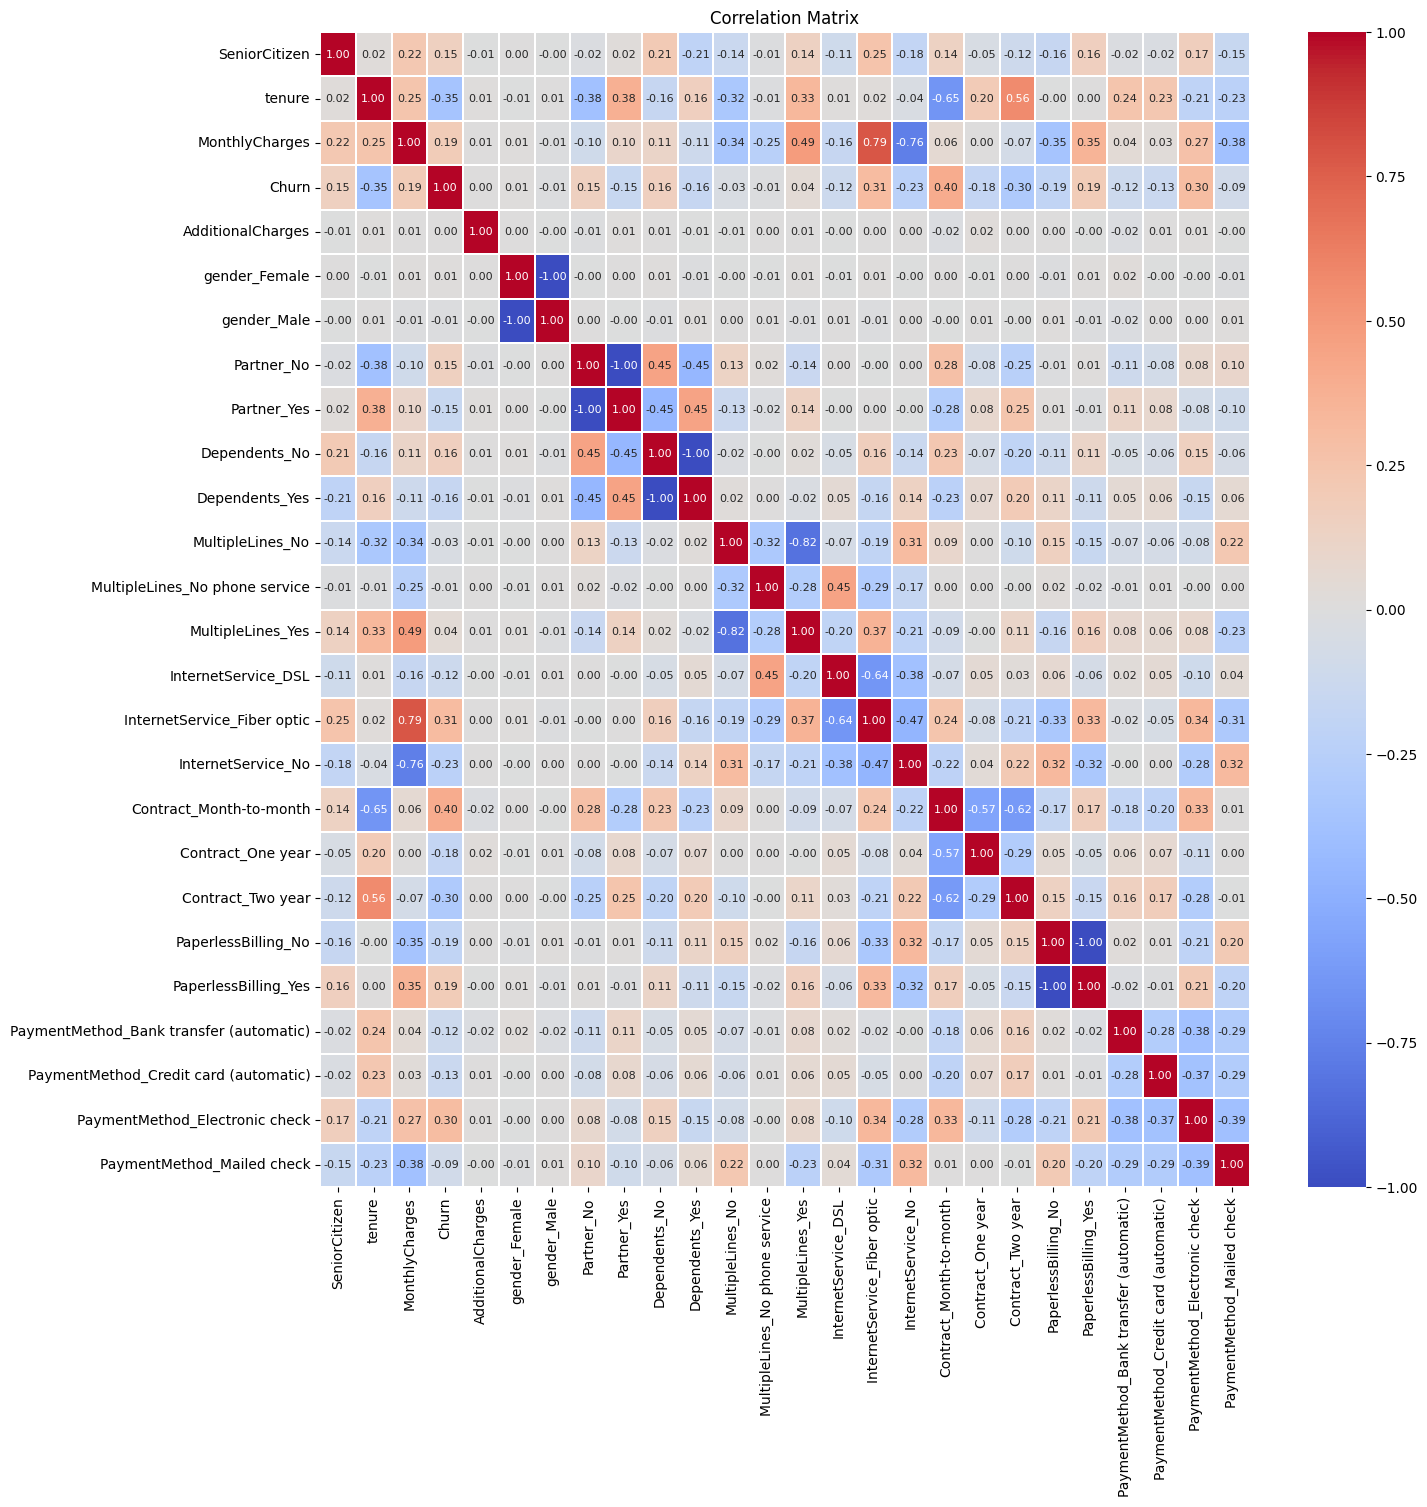

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
correlation_matrix = churn_inference.corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

# **Inference Model**

## **Decision Tree**

In [ ]:
# Define the features and the target
X = churn_inference.drop('Churn', axis=1)  # Drop the target column to create the features matrix
y = churn_inference['Churn'].astype(int)  # Convert target column to integer type

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)


In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=66)

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=66)

In [ ]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.7277896233120114
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1046
           1       0.47      0.49      0.48       361

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407



### Feature Imporance

In [ ]:
feature_importance = dt_classifier.feature_importances_
# Create a DataFrame to view the feature names and their corresponding importance
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)  # Sorting to show most important features first

In [ ]:
# Print the feature importances
print(features_df)

                                  Feature  Importance
1                                  tenure    0.256392
2                          MonthlyCharges    0.229499
3                       AdditionalCharges    0.181573
9             InternetService_Fiber optic    0.111225
5                             Partner_Yes    0.028697
13                   PaperlessBilling_Yes    0.025688
4                             gender_Male    0.025060
15         PaymentMethod_Electronic check    0.024053
0                           SeniorCitizen    0.020135
8                       MultipleLines_Yes    0.017816
6                          Dependents_Yes    0.016707
14  PaymentMethod_Credit card (automatic)    0.013677
11                      Contract_One year    0.012773
16             PaymentMethod_Mailed check    0.012187
10                     InternetService_No    0.012044
12                      Contract_Two year    0.006404
7          MultipleLines_No phone service    0.006071


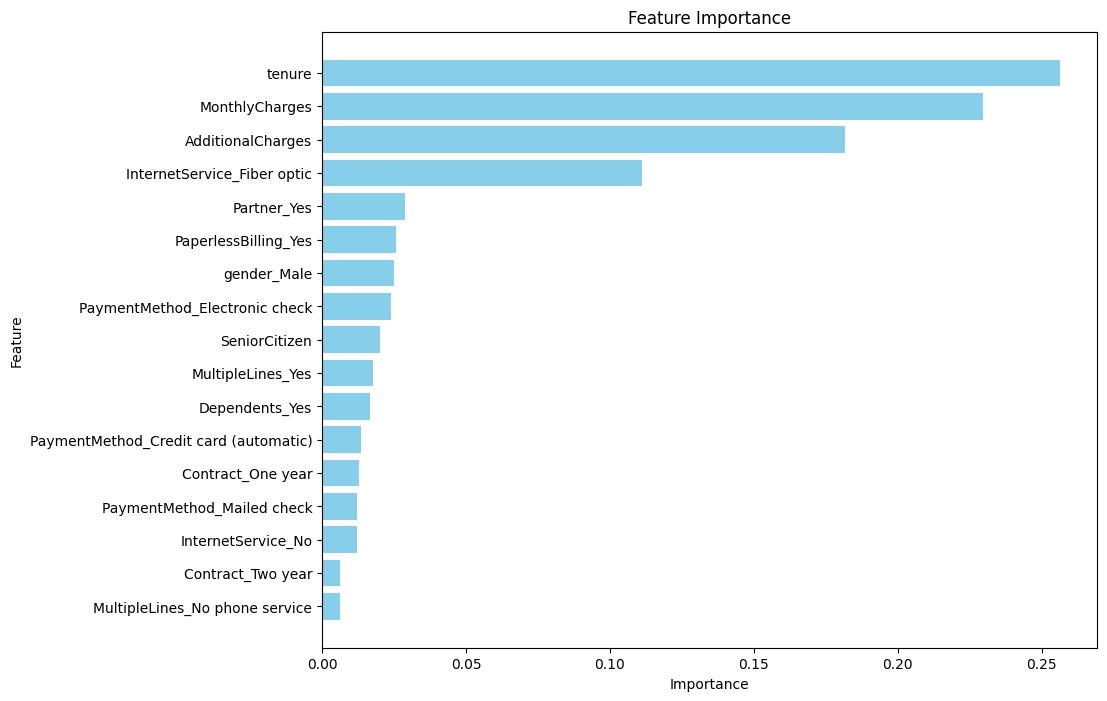

In [ ]:
import matplotlib.pyplot as plt

# Visualize feature importances
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


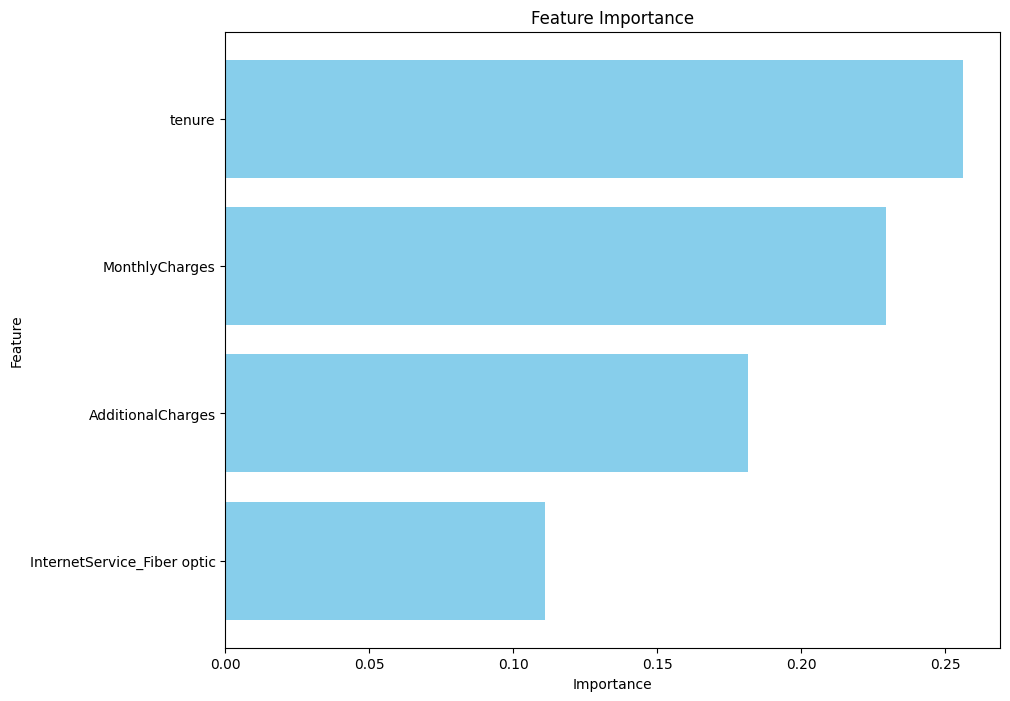

In [ ]:
import matplotlib.pyplot as plt

# Set the threshold for display
threshold = 0.06  # or any other value you choose based on the strategies mentioned above

# Filter the DataFrame to only include features above the threshold
filtered_features_df = features_df[features_df['Importance'] > threshold]

# Visualize feature importances
plt.figure(figsize=(10, 8))
plt.barh(filtered_features_df['Feature'], filtered_features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


## **Logistic Regression**


In [ ]:
# Assuming `df` is your DataFrame
bool_cols = [col for col in churn_inference.columns if churn_inference[col].dtype == 'bool']

# Convert boolean columns to int
churn_inference[bool_cols] = churn_inference[bool_cols].astype(int)

In [ ]:
# Define the features and the target
X_logistic = churn_inference.drop('Churn', axis=1)  # Drop the target column to create the features matrix
y_logistic = churn_inference['Churn'].astype(int)  # Convert target column to integer type

# Split data into training and testing sets
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=66)

In [ ]:
import statsmodels.api as sm

# Add a constant to the features
X_train_lg_with_const = sm.add_constant(X_train_lg)

# Choose a regularization strength
C_chosen = 1.0  # This is just a starting point

# Fit the regularized logistic regression model with L1 penalty
model = sm.Logit(y_train_lg, X_train_lg_with_const)
result = model.fit_regularized(method='l1', alpha=1/C_chosen, disp=0)

# Print the summary of the model
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5610
Method:                           MLE   Df Model:                           14
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.2668
Time:                        01:31:04   Log-Likelihood:                -2397.7
converged:                       True   LL-Null:                       -3270.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2369      0.163     -7.609      0.000      -1.556      -0.918
SeniorCitizen                                  0  

# **Predictive Model**

## **Data Preparation**

### Check multicolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_processed_df_large.columns
vif_data["VIF"] = [variance_inflation_factor(X_processed_df_large.values, i) for i in range(len(X_processed_df_large.columns))]

# Review features with a high VIF score
print(vif_data[vif_data['VIF'] > 10])

# Decide on a threshold for removing features and create a mask for features to keep
vif_threshold = 10
features_to_keep = vif_data[vif_data['VIF'] < vif_threshold]['feature'].values

# Subset the original DataFrame to remove features with high VIF
X_subset = X_processed_df_large[_largefeatures_to_keep]

### Deal with null

In [ ]:
# table manipulation
service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
churn_large = churn.copy()
churn_large = churn_large.drop(columns = service_columns)
churn_large = churn_large.drop(columns = 'PhoneService')
churn_large['TotalCharges'] = pd.to_numeric(churn_large['TotalCharges'], errors='coerce')
churn_large = churn_large.dropna()
churn_large

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No phone service,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,No,DSL,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,No,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No phone service,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,No,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,DSL,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Fiber optic,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No phone service,DSL,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Fiber optic,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Deal with multicolinearity

In [ ]:
churn_large['AdditionalCharges'] = churn_large['TotalCharges'] - (churn_large['MonthlyCharges'] * churn_large['tenure'])
churn_large = churn_large.drop(columns = 'TotalCharges')
churn_large.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,AdditionalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No phone service,DSL,Month-to-month,Yes,Electronic check,29.85,No,0.00
1,5575-GNVDE,Male,0,No,No,34,No,DSL,One year,No,Mailed check,56.95,No,-46.80
2,3668-QPYBK,Male,0,No,No,2,No,DSL,Month-to-month,Yes,Mailed check,53.85,Yes,0.45
3,7795-CFOCW,Male,0,No,No,45,No phone service,DSL,One year,No,Bank transfer (automatic),42.30,No,-62.75
4,9237-HQITU,Female,0,No,No,2,No,Fiber optic,Month-to-month,Yes,Electronic check,70.70,Yes,10.25


### Transformation

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify numerical and categorical columns as you have done
numerical_cols = churn_large.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = [col for col in churn_large.columns if churn_large[col].dtype == 'object' and col not in ['customerID', 'Churn']]

# Create the preprocessing pipelines for both numerical and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')  # handle_unknown='ignore' is useful if the test data contains categories not present in the training data

# Combine the numeric and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit the transformations and apply them to the numerical and categorical features
X_processed_large = preprocessor.fit_transform(churn_large.drop(['customerID', 'Churn'], axis=1))
Y_large = churn_large['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# If you want to get the feature names after one-hot encoding, which can be useful for interpreting models
# Note: This will work if you have scikit-learn version 0.21 or later
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
new_columns = numerical_cols + onehot_columns.tolist()

# Now `X_processed` is an array with transformed features, you can convert it back to a DataFrame if you wish
import pandas as pd
X_processed_df_large = pd.DataFrame(X_processed_large, columns=new_columns)
X_processed_df_large.head()

,SeniorCitizen,tenure,MonthlyCharges,AdditionalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-0.002278,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.440327,0.064303,-0.260878,-0.698183,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.440327,-1.239504,-0.363923,0.004413,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.440327,0.512486,-0.747850,-0.935356,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.440327,-1.239504,0.196178,0.150137,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## **1. AdaBoost**

### **1.1 AdaBoost Large**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score  # Import accuracy_score

X_train_large_ada, X_test_large_ada, y_train_large_ada, y_test_large_ada = train_test_split(X_processed_df_large.drop(columns = 'AdditionalCharges'), Y_large, test_size=0.2, random_state=66)
base_learner = DecisionTreeClassifier()

# Define a simpler, more focused grid
ada_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.1, 1],
    'algorithm': ['SAMME.R']
}
base_params = {
    'base_estimator__criterion': ['gini', 'entropy'],
    'base_estimator__max_depth': [1, 10],
    'base_estimator__min_samples_split': [2, 50],
    'base_estimator__min_samples_leaf': [1, 10]
}

ada_boost = AdaBoostClassifier(base_estimator=base_learner, random_state=66)
params = {**base_params, **ada_params}

grid_search = GridSearchCV(estimator=ada_boost, param_grid=params, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_large_ada, y_train_large_ada)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_large_ada = best_model.predict(X_test_large_ada)
accuracy = accuracy_score(y_test_large_ada, y_pred_large_ada)

print("Best parameters:", best_params)
print(f"Test set accuracy: {accuracy:.2f}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters: {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__min_samples_leaf': 10, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 500}
Test set accuracy: 0.81


### **1.2 AdaBoost Small**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score  # Import accuracy_score

fiber_customers = X_processed_df_large[X_processed_df_large['InternetService_Fiber optic'] == 1]

# Drop the 'InternetService' columns to focus on other features
fiber_customers = fiber_customers.drop(['InternetService_Fiber optic', 'InternetService_No', 'InternetService_DSL'], axis=1, errors='ignore')

# Corresponding targets
fiber_targets = Y_large.iloc[fiber_customers.index]

# Split the data
X_train_fiber, X_test_fiber, y_train_fiber, y_test_fiber = train_test_split(fiber_customers, fiber_targets, test_size=0.2, random_state=66)

base_learner = DecisionTreeClassifier()

# Define a simpler, more focused grid
ada_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.1, 1],
    'algorithm': ['SAMME.R']
}
base_params = {
    'base_estimator__criterion': ['gini', 'entropy'],
    'base_estimator__max_depth': [1, 10],
    'base_estimator__min_samples_split': [2, 50],
    'base_estimator__min_samples_leaf': [1, 10]
}

ada_boost = AdaBoostClassifier(base_estimator=base_learner, random_state=66)
params = {**base_params, **ada_params}

grid_search = GridSearchCV(estimator=ada_boost, param_grid=params, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_fiber, y_train_fiber)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_large_ada = best_model.predict(X_test_fiber)
accuracy = accuracy_score(y_test_fiber, y_pred_large_ada)

print("Best parameters:", best_params)
print(f"Test set accuracy: {accuracy:.2f}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters: {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 500}
Test set accuracy: 0.70


## **2. Random Forest**

### **2.1 Random Forest Large**

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy of the best Random Forest model: 0.80
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1046
           1       0.64      0.50      0.56       361

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



<Figure size 1000x800 with 0 Axes>

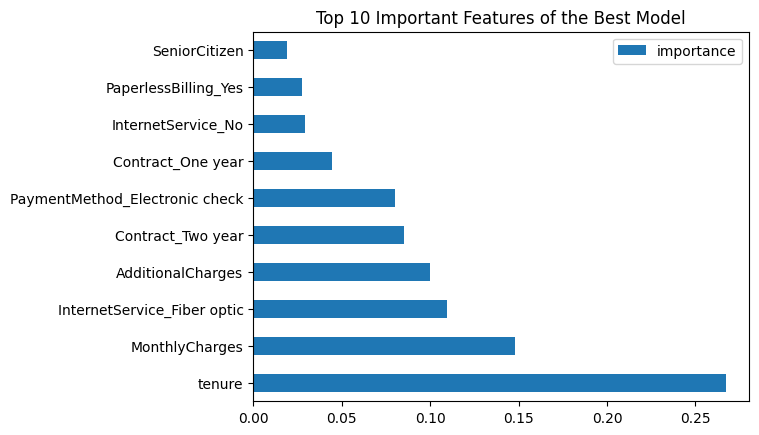

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Splitting the dataset
X_train_large_rf, X_test_large_rf, y_train_large_rf, y_test_large_rf = train_test_split(
    X_processed_df_large, Y_large, test_size=0.2, random_state=66)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4]
}

# Initialize the GridSearchCV with RandomForest model and parameter grid
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=66),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Perform the grid search
grid_search_rf.fit(X_train_large_rf, y_train_large_rf)

# Get the best parameters and the best model
best_params = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Feature Importance for the best model
best_feature_importances = pd.DataFrame(
    best_rf_model.feature_importances_,
    index = X_train_large_rf.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

# Evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test_large_rf)
best_accuracy = accuracy_score(y_test_large_rf, y_pred_best_rf)

print("Best parameters:", best_params)
print(f"Accuracy of the best Random Forest model: {best_accuracy:.2f}")
print(classification_report(y_test_large_rf, y_pred_best_rf))

# Plotting feature importances for the best model
plt.figure(figsize=(10, 8))
best_feature_importances[:10].plot(kind='barh')
plt.title('Top 10 Important Features of the Best Model')
plt.show()

In [ ]:
churn_large[churn_large['InternetService'] == 'Fiber optic']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,Female,0,No,No,2,No,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Fiber optic,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Fiber optic,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Fiber optic,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Fiber optic,One year,No,Credit card (automatic),100.35,5681.10,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,0639-TSIQW,Female,0,No,No,67,Yes,Fiber optic,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,No,Fiber optic,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Fiber optic,One year,Yes,Credit card (automatic),103.20,7362.90,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Fiber optic,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### **2.2 Random Forest Small**

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy of the best Random Forest model: 0.70
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       362
           1       0.63      0.66      0.64       258

    accuracy                           0.70       620
   macro avg       0.69      0.69      0.69       620
weighted avg       0.70      0.70      0.70       620



<Figure size 1000x800 with 0 Axes>

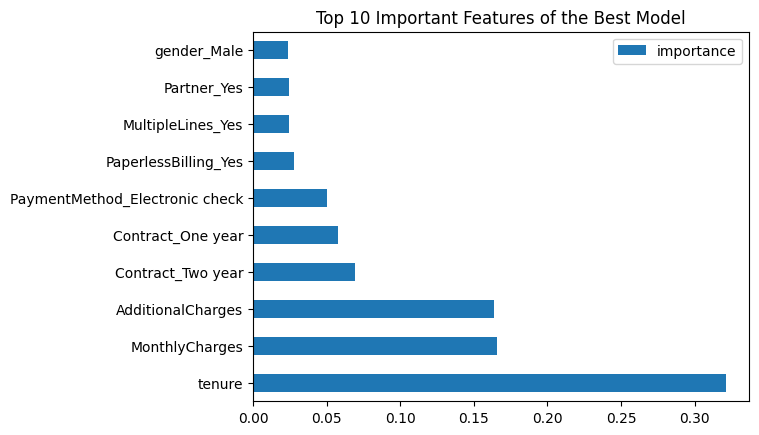

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'InternetService' is a column in your dataframe and 'Fiber optic' is a category within that column
fiber_customers = X_processed_df_large[X_processed_df_large['InternetService_Fiber optic'] == 1]

# Drop the 'InternetService' columns to focus on other features
fiber_customers = fiber_customers.drop(['InternetService_Fiber optic', 'InternetService_No', 'InternetService_DSL'], axis=1, errors='ignore')

# Corresponding targets
fiber_targets = Y_large.iloc[fiber_customers.index]

# Splitting the dataset
X_train_samll_rf, X_test_samll_rf, y_train_samll_rf, y_test_samll_rf = train_test_split(
    fiber_customers, fiber_targets, test_size=0.2, random_state=66)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4]
}

# Initialize the GridSearchCV with RandomForest model and parameter grid
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=66),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Perform the grid search
grid_search_rf.fit(X_train_samll_rf, y_train_samll_rf)

# Get the best parameters and the best model
best_params = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Feature Importance for the best model
best_feature_importances = pd.DataFrame(
    best_rf_model.feature_importances_,
    index = X_train_samll_rf.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

# Evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test_samll_rf)
best_accuracy = accuracy_score(y_test_samll_rf, y_pred_best_rf)

print("Best parameters:", best_params)
print(f"Accuracy of the best Random Forest model: {best_accuracy:.2f}")
print(classification_report(y_test_samll_rf, y_pred_best_rf))

# Plotting feature importances for the best model
plt.figure(figsize=(10, 8))
best_feature_importances[:10].plot(kind='barh')
plt.title('Top 10 Important Features of the Best Model')
plt.show()

## **3. DNN**

### **3.1 DNN Large**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE

# Assuming X_processed_df_large is your feature dataframe and Y_large is the target series
X_train_large_dnn, X_test_large_dnn, y_train_large_dnn, y_test_large_dnn = train_test_split(
    X_processed_df_large, Y_large, test_size=0.2, random_state=66)

# Initialize Borderline SMOTE
smote = BorderlineSMOTE(kind='borderline-1', random_state=66)  # You can also try 'borderline-2'

# Apply Borderline SMOTE to the training data
X_train_smote_dnn, y_train_smote_dnn = smote.fit_resample(X_train_large_dnn, y_train_large_dnn)

# Since this is a binary classification problem, we should convert the target variable to categorical
y_train_smote_dnn = to_categorical(y_train_smote_dnn)
y_test_large_dnn = to_categorical(y_test_large_dnn)

# Define the model with L1 regularization
model = Sequential()
model.add(Dense(64, input_dim=X_train_smote_dnn.shape[1], activation='relu', kernel_regularizer=l1(0.01)))  # Input layer and first hidden layer
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))  # Second hidden layer
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote_dnn, y_train_smote_dnn, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
eval_results = model.evaluate(X_test_large_dnn, y_test_large_dnn)
print(f'Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}')

Epoch 1/100
232/232 [==============================] - 3s 6ms/step - loss: 2.3145 - accuracy: 0.6047 - val_loss: 0.9510 - val_accuracy: 0.0000e+00
Epoch 2/100
232/232 [==============================] - 1s 4ms/step - loss: 0.7152 - accuracy: 0.6019 - val_loss: 0.8068 - val_accuracy: 0.1080
Epoch 3/100
232/232 [==============================] - 1s 3ms/step - loss: 0.6826 - accuracy: 0.6530 - val_loss: 0.7785 - val_accuracy: 0.4806
Epoch 4/100
232/232 [==============================] - 1s 3ms/step - loss: 0.6740 - accuracy: 0.6640 - val_loss: 0.8070 - val_accuracy: 0.4466
Epoch 5/100
232/232 [==============================] - 1s 3ms/step - loss: 0.6668 - accuracy: 0.6677 - val_loss: 0.7957 - val_accuracy: 0.5133
Epoch 6/100
232/232 [==============================] - 1s 3ms/step - loss: 0.6618 - accuracy: 0.6726 - val_loss: 0.7905 - val_accuracy: 0.5485
Epoch 7/100
232/232 [==============================] - 1s 3ms/step - loss: 0.6593 - accuracy: 0.6746 - val_loss: 0.7656 - val_accuracy: 0.

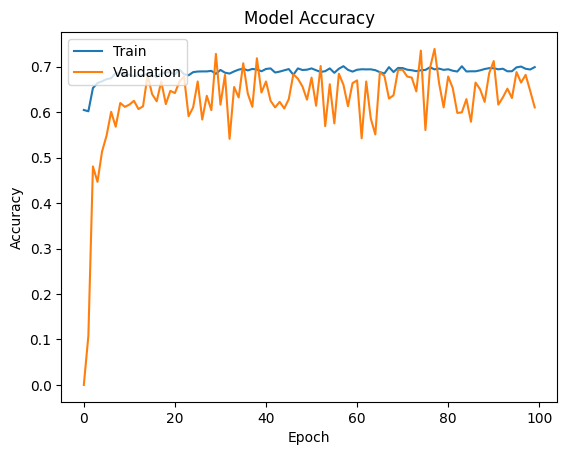

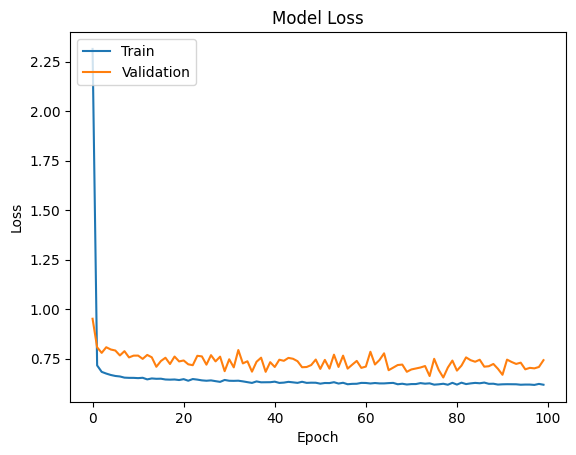

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **3.2 DNN Small**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
import pandas as pd

# Assuming 'InternetService' is a column in your dataframe and 'Fiber optic' is a category within that column
fiber_customers = X_processed_df_large[X_processed_df_large['InternetService_Fiber optic'] == 1]

# Drop the 'InternetService' columns to focus on other features
fiber_customers = fiber_customers.drop(['InternetService_Fiber optic', 'InternetService_No', 'InternetService_DSL'], axis=1, errors='ignore')

# Corresponding targets
fiber_targets = Y_large.iloc[fiber_customers.index]

# Split the data
X_train_fiber, X_test_fiber, y_train_fiber, y_test_fiber = train_test_split(fiber_customers, fiber_targets, test_size=0.2, random_state=66)

# Define the DNN model
model_fiber = Sequential()
model_fiber.add(Dense(64, input_dim=X_train_fiber.shape[1], activation='relu', kernel_regularizer=l1(0.01)))
model_fiber.add(Dropout(0.4))
model_fiber.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))
model_fiber.add(Dropout(0.3))
model_fiber.add(Dense(1, activation='sigmoid'))

# Compile the model
model_fiber.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_fiber = model_fiber.fit(X_train_fiber, y_train_fiber, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
eval_results_fiber = model_fiber.evaluate(X_test_fiber, y_test_fiber)
print(f'Test Loss: {eval_results_fiber[0]}, Test Accuracy: {eval_results_fiber[1]}')

Epoch 1/100
70/70 [==============================] - 3s 6ms/step - loss: 3.7580 - accuracy: 0.5812 - val_loss: 2.9582 - val_accuracy: 0.6452
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 2.3428 - accuracy: 0.6338 - val_loss: 1.7706 - val_accuracy: 0.6774
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 1.3804 - accuracy: 0.6795 - val_loss: 1.0404 - val_accuracy: 0.7056
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 0.8801 - accuracy: 0.6741 - val_loss: 0.7688 - val_accuracy: 0.6895
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.6580 - val_loss: 0.7086 - val_accuracy: 0.6855
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 0.7043 - accuracy: 0.6598 - val_loss: 0.6877 - val_accuracy: 0.6895
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.6548 - val_loss: 0.6770 - val_accuracy: 0.6855
Epoch 8/100
7

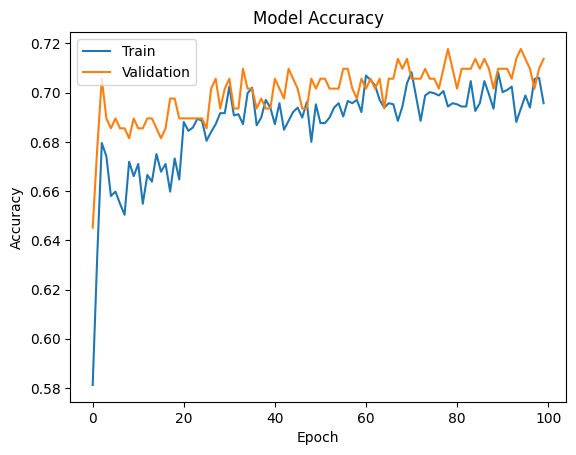

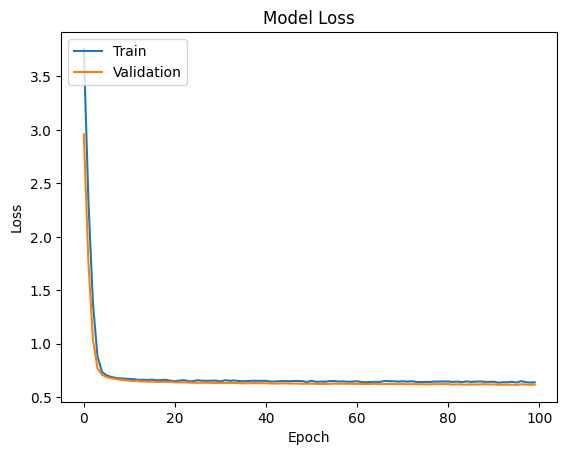

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_fiber.history['accuracy'])
plt.plot(history_fiber.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_fiber.history['loss'])
plt.plot(history_fiber.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<Axes: xlabel='Churn'>

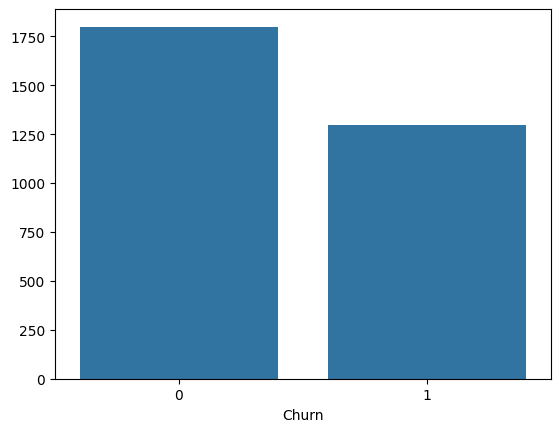

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_dist = fiber_targets.value_counts()
sns.barplot(x=churn_dist.index, y=churn_dist.values)

## **4. Logistic**

### **4.1 Logistic Large**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming X_processed_df_large and Y_large are already defined and the data is scaled
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_processed_df_large, Y_large, test_size=0.3, random_state=66)

# Initialize the Logistic Regression model with L1 regularization
logistic_regression = LogisticRegression(penalty='l1', solver='liblinear', random_state=66)

# Define a grid of parameters to search
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength; smaller values specify stronger regularization
}

# Setup the grid search for hyperparameter tuning
grid_search_lr = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search_lr.fit(X_train_lr, y_train_lr)

# Best model and parameters
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_

# Evaluate the best model on the test set
y_pred_lr = best_model_lr.predict(X_test_lr)
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)

print("Best parameters for Logistic Regression:", best_params_lr)
print(f"Test set accuracy for Logistic Regression: {accuracy_lr:.2f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters for Logistic Regression: {'C': 1}
Test set accuracy for Logistic Regression: 0.80


### **4.2 Logistic Small**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

fiber_customers = X_processed_df_large[X_processed_df_large['InternetService_Fiber optic'] == 1]

# Drop the 'InternetService' columns to focus on other features
fiber_customers = fiber_customers.drop(['InternetService_Fiber optic', 'InternetService_No', 'InternetService_DSL'], axis=1, errors='ignore')

# Corresponding targets
fiber_targets = Y_large.iloc[fiber_customers.index]

# Split the data
X_train_fiber, X_test_fiber, y_train_fiber, y_test_fiber = train_test_split(fiber_customers, fiber_targets, test_size=0.2, random_state=66)

# Initialize the Logistic Regression model with L1 regularization
logistic_regression = LogisticRegression(penalty='l1', solver='liblinear', random_state=66)

# Define a grid of parameters to search
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength; smaller values specify stronger regularization
}

# Setup the grid search for hyperparameter tuning
grid_search_lr = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search_lr.fit(X_train_fiber, y_train_fiber)

# Best model and parameters
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_

# Evaluate the best model on the test set
y_pred_lr = best_model_lr.predict(X_test_fiber)
accuracy_lr = accuracy_score(y_test_fiber, y_pred_lr)

print("Best parameters for Logistic Regression:", best_params_lr)
print(f"Test set accuracy for Logistic Regression: {accuracy_lr:.2f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression: {'C': 0.1}
Test set accuracy for Logistic Regression: 0.70
